<a href="https://colab.research.google.com/github/Sucerquia/machine-learning/blob/master/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


#get the training set and the test set
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
#import the data base from the github repository
url = "https://raw.githubusercontent.com/Sucerquia/machine-learning/master/Incidentes_georreferenciados_2019.csv"
info = pd.read_csv(url)

#we show the data complete
info.head()

,OBJECTID,RADICADO,HORA,DIA,PERIODO,CLASE,DIRECCION_ENC,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
0,790144,1717722,01:35:00,1,2020,Choque,CL 010 A 041 000 00000,Malla vial,CON HERIDOS,El Poblado,El Poblado,Tramo de via,MIÉRCOLES,7,JULIO,834977.94,1178769.85,-75.568507,6.210703
1,790145,1714151,11:30:00,8,2020,Choque,CR 038 049 A 000 00000,Malla vial,SOLO DAÑOS,Boston,La Candelaria,Tramo de via,VIERNES,5,MAYO,836034.83,1182513.26,-75.558959,6.244545
2,790146,1727015,08:25:00,19,2020,Otro,CR 057 051 000 00000,Malla vial,SOLO DAÑOS,San Benito,La Candelaria,Tramo de via,LUNES,10,OCTUBRE,834254.74,1183457.46,-75.575041,6.253081
3,790147,1718974,06:30:00,15,2020,Choque,CL 005 047 000 00000,No Ubicada,CON HERIDOS,Sin Inf,Sin Inf,Interseccion,MIÉRCOLES,7,JULIO,820000.00,1180000.00,-75.703816,6.221806
4,790148,1712988,02:00:00,5,2020,Choque,CR 062 050 000 00000,Malla vial,CON HERIDOS,San Benito,La Candelaria,Tramo de via,DOMINGO,4,ABRIL,834101.73,1183542.28,-75.576423,6.253848


Es claro que hay datos que no son relevantes como el número del radicado o el tipo de geolocalización, por esa razón, es necesario hacer una limpieza de la base de datos en la que sólo queden los datos relevantes, como sigue

In [30]:
clean = ["CLASE", "OBJECTID",	"RADICADO",	"PERIODO", "DIRECCION_ENC", "TIPO_GEOCOD", "DISENO", "X_MAGNAMED", "Y_MAGNAMED", "BARRIO", "COMUNA", "MES_NOMBRE"]
for char in clean:
  info = info.drop(char, axis = 1)
info.head()

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,CON HERIDOS,MIÉRCOLES,7,-75.568507,6.210703
1,11:30:00,8,SOLO DAÑOS,VIERNES,5,-75.558959,6.244545
2,08:25:00,19,SOLO DAÑOS,LUNES,10,-75.575041,6.253081
3,06:30:00,15,CON HERIDOS,MIÉRCOLES,7,-75.703816,6.221806
4,02:00:00,5,CON HERIDOS,DOMINGO,4,-75.576423,6.253848


Otro factor imporante es considerar que, dado que nuestro proceso de aprendizaje en las redes neuronales se da para números y no para caracteres, se hace necesario cambiar por ejemplo cambiar las caracteristicas por cantidades numéricas.

In [31]:
for x in range(len(info["GRAVEDAD"])):
  if info["GRAVEDAD"][x] == 'SOLO DAÑOS':
    info["GRAVEDAD"][x] = 'ASOLO DAÑOS'
  if info["GRAVEDAD"][x] == 'CON HERIDOS':
    info["GRAVEDAD"][x] = 'BCON HERIDOS'
  if info["GRAVEDAD"][x] == 'CON MUERTOS':
    info["GRAVEDAD"][x] = 'CCON MUERTOS'
#We change the cualitative values by numbers
encoder = LabelEncoder()
encoder.classes_ = ['SOLO DAÑOS', 'CON HERIDOS', 'CON MUERTOS']
info["GRAVEDAD"] = encoder.fit_transform(info["GRAVEDAD"])
print(encoder.classes_)
info.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


['ASOLO DAÑOS' 'BCON HERIDOS' 'CCON MUERTOS']


,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,1,MIÉRCOLES,7,-75.568507,6.210703
1,11:30:00,8,0,VIERNES,5,-75.558959,6.244545
2,08:25:00,19,0,LUNES,10,-75.575041,6.253081
3,06:30:00,15,1,MIÉRCOLES,7,-75.703816,6.221806
4,02:00:00,5,1,DOMINGO,4,-75.576423,6.253848


In [32]:
for x in range(len(info["DIA_NOMBRE"])):
  if info["DIA_NOMBRE"][x] == 'LUNES    ':
    info["DIA_NOMBRE"][x] = 'ALUNES'
  if info["DIA_NOMBRE"][x] == 'MARTES   ':
    info["DIA_NOMBRE"][x] = 'BMARTES'
  if info["DIA_NOMBRE"][x] == 'MIÉRCOLES':
    info["DIA_NOMBRE"][x] = 'CMIÉRCOLES'
  if info["DIA_NOMBRE"][x] == 'JUEVES   ':
    info["DIA_NOMBRE"][x] = 'DJUEVES'
  if info["DIA_NOMBRE"][x] == 'VIERNES  ':
    info["DIA_NOMBRE"][x] = 'EVIERNES'
  if info["DIA_NOMBRE"][x] == 'SÁBADO   ':
    info["DIA_NOMBRE"][x] = 'FSABADO'
  if info["DIA_NOMBRE"][x] == 'DOMINGO  ':
    info["DIA_NOMBRE"][x] = 'GDOMINGO'
#We change the cualitative values by numbers
encoder2 = LabelEncoder()
info["DIA_NOMBRE"] = encoder2.fit_transform(info["DIA_NOMBRE"])
print(encoder2.classes_)
info.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packa

['ALUNES' 'BMARTES' 'CMIÉRCOLES' 'DJUEVES' 'EVIERNES' 'FSABADO' 'GDOMINGO']


,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,1,2,7,-75.568507,6.210703
1,11:30:00,8,0,4,5,-75.558959,6.244545
2,08:25:00,19,0,0,10,-75.575041,6.253081
3,06:30:00,15,1,2,7,-75.703816,6.221806
4,02:00:00,5,1,6,4,-75.576423,6.253848


In [33]:
info["HORA"] = [int(k[:2]) for k in info["HORA"]]
info.head()

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,1,1,1,2,7,-75.568507,6.210703
1,11,8,0,4,5,-75.558959,6.244545
2,8,19,0,0,10,-75.575041,6.253081
3,6,15,1,2,7,-75.703816,6.221806
4,2,5,1,6,4,-75.576423,6.253848


Además, es necesario verificar que los datos corresponden efectivamente a datos dentro de la ciudad de medellín, que como se ve a continuación, no es el caso para esta base de datos, para lo cual se hace necesario quitar los valores que no corresponden o están dañados.

Text(0.5, 0, 'longitud')

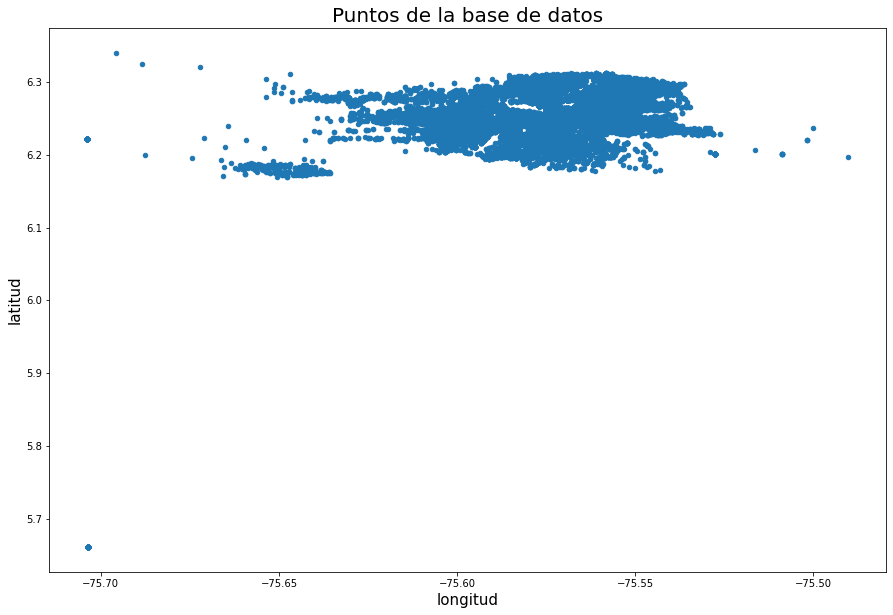

In [34]:
info.plot(kind="scatter", x="LONGITUD", y="LATITUD", figsize = (15,10))
plt.title("Puntos de la base de datos", fontsize = 20)
plt.ylabel("latitud", fontsize = 15)
plt.xlabel("longitud", fontsize = 15)

![picture](https://drive.google.com/uc?id=1fy6b9RXcjqr4SzM5LDAv-LmX-5YtgRJy)

De manera que se verifica que la información que se encuentra en estros datos debe ser descartada porque son errores en su creación. y se procede a eliminarlos

In [35]:
info.iloc[np.where(info["LATITUD"]==info["LATITUD"].min())[0].tolist()]

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
188,7,13,1,6,9,-75.703675,5.661296
200,5,9,1,4,10,-75.703675,5.661296
206,6,4,0,6,10,-75.703675,5.661296
241,2,29,0,1,9,-75.703675,5.661296
251,5,9,1,2,9,-75.703675,5.661296
...,...,...,...,...,...,...,...
25053,4,7,0,0,9,-75.703675,5.661296
25172,1,17,0,5,10,-75.703675,5.661296
25223,8,17,1,3,9,-75.703675,5.661296
25354,10,17,1,5,10,-75.703675,5.661296


Text(0.5, 0, 'longitud')

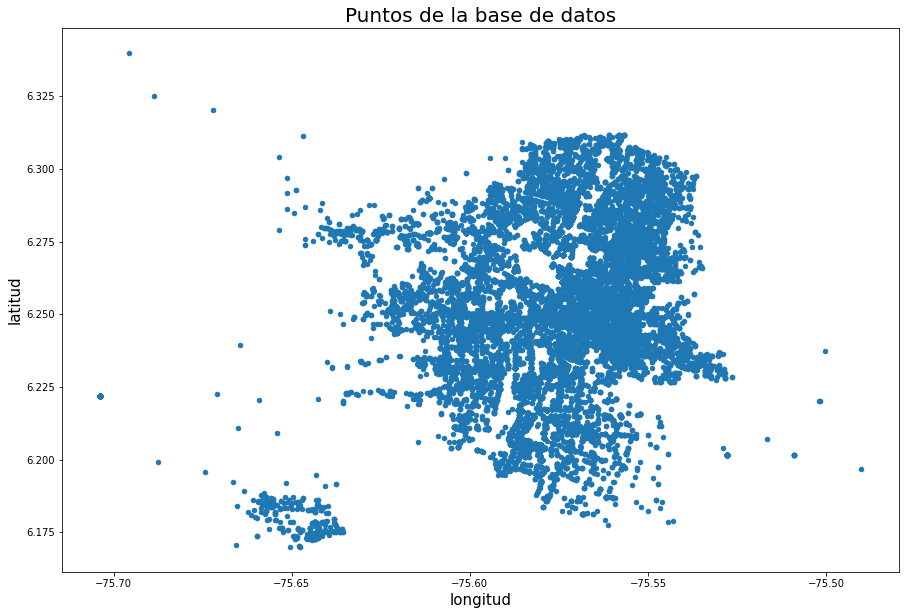

In [36]:
info = info.drop(np.where(info["LATITUD"]==info["LATITUD"].min())[0].tolist(), axis=0)
info.plot(kind="scatter", x="LONGITUD", y="LATITUD", figsize = (15,10))
plt.title("Puntos de la base de datos", fontsize = 20)
plt.ylabel("latitud", fontsize = 15)
plt.xlabel("longitud", fontsize = 15)

In [37]:
train_set, test_set = split_train_test(info, 0.2)

In [38]:
train_set

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
3187,9,5,1,0,10,-75.542841,6.238721
10343,7,5,0,6,1,-75.552431,6.306575
2933,7,4,1,1,2,-75.592262,6.234658
13069,5,25,1,1,8,-75.575140,6.256581
19648,6,22,1,5,2,-75.582820,6.231677
...,...,...,...,...,...,...,...
12600,3,27,1,5,6,-75.561679,6.292963
12700,4,29,1,2,1,-75.574167,6.261086
12309,3,1,0,5,2,-75.593717,6.233749
5091,6,14,0,2,10,-75.565113,6.302768


In [39]:
info[187:190]

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
187,12,4,0,5,1,-75.594908,6.262642
189,10,11,0,1,2,-75.566759,6.286774
190,8,23,1,2,9,-75.563876,6.307885


In [40]:
X_test = test_set.drop(["GRAVEDAD", "DIA_NOMBRE", "DIA"], axis = 1)
Y_test = test_set["GRAVEDAD"].copy()

In [41]:
X_test

,HORA,MES,LONGITUD,LATITUD
17840,11,10,-75.606643,6.230443
6315,6,1,-75.612191,6.255061
18887,4,8,-75.560227,6.287266
1943,11,6,-75.587938,6.210407
13697,7,8,-75.558008,6.273472
...,...,...,...,...
18070,3,4,-75.585867,6.218874
4725,11,8,-75.567872,6.305324
10762,8,9,-75.559291,6.253456
3978,7,2,-75.703816,6.221806


In [42]:
X_train = train_set.drop(["GRAVEDAD", "DIA_NOMBRE", "DIA"], axis = 1)
Y_train = train_set["GRAVEDAD"].copy()

In [43]:
X_train

,HORA,MES,LONGITUD,LATITUD
3187,9,10,-75.542841,6.238721
10343,7,1,-75.552431,6.306575
2933,7,2,-75.592262,6.234658
13069,5,8,-75.575140,6.256581
19648,6,2,-75.582820,6.231677
...,...,...,...,...
12600,3,6,-75.561679,6.292963
12700,4,1,-75.574167,6.261086
12309,3,2,-75.593717,6.233749
5091,6,10,-75.565113,6.302768


In [44]:
Y_train

3187     1
10343    0
2933     1
13069    1
19648    1
        ..
12600    1
12700    1
12309    0
5091     0
6935     1
Name: GRAVEDAD, Length: 19981, dtype: int64

In [45]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

# **first trial**

In [ ]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 6))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(type(model))
# Train the ANN
model.fit(X_train, Y_train, batch_size = 32, epochs = 5)

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Epoch 1/5
625/625 [==============================] - 1s 1ms/step - loss: 0.6698 - accuracy: 0.6032
Epoch 2/5
625/625 [==============================] - 1s 1ms/step - loss: 0.6669 - accuracy: 0.6032
Epoch 3/5
625/625 [==============================] - 1s 1ms/step - loss: 0.6663 - accuracy: 0.6032
Epoch 4/5
625/625 [==============================] - 1s 1ms/step - loss: 0.6661 - accuracy: 0.6032
Epoch 5/5
625/625 [==============================] - 1s 1ms/step - loss: 0.6657 - accuracy: 0.6032


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model

<function __main__.model>

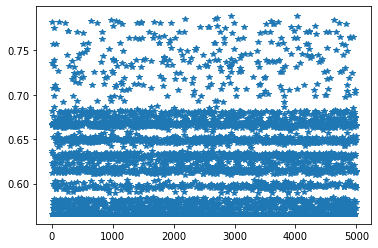

In [ ]:
plt.plot(y_pred, '*')
#plt.plot(Y_test, '*')

In [ ]:
np.shape(Y_test)

(4995,)

# **Second Trial**

In [ ]:
Y_0 = (Y_train==0)

In [ ]:
Y_0

11315     True
20902    False
405      False
9501     False
12701    False
         ...  
12691    False
19493     True
22192     True
24576     True
16485     True
Name: GRAVEDAD, Length: 19981, dtype: bool

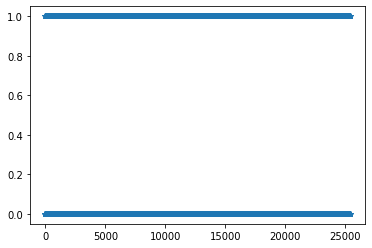

In [ ]:
plt.plot(Y_0, '*')

In [ ]:
def model():
  model = Sequential()
  model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
  model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
def decision(X, Y):
  y_0 = (Y == 0)
  y_1 = (Y == 1)
  y_2 = (Y == 2)

  m0 = model()
  m1 = model()
  m2 = model()

  y0_pred = m0.fit(X, y_0, batch_size = 32, epochs = 200)
  y1_pred = m1.fit(X, y_1, batch_size = 32, epochs = 200)
  y2_pred = m2.fit(X, y_2, batch_size = 32, epochs = 200)

  return y0_pred, y1_pred, y2_pred

In [ ]:
pred = decision(X_train, Y_train)

Epoch 1/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6731 - accuracy: 0.6050
Epoch 2/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6709 - accuracy: 0.6050
Epoch 3/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.6050
Epoch 4/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6708 - accuracy: 0.6050
Epoch 5/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6705 - accuracy: 0.6050
Epoch 6/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6704 - accuracy: 0.6050
Epoch 7/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6703 - accuracy: 0.6050
Epoch 8/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6702 - accuracy: 0.6050
Epoch 9/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6703 - accuracy: 0.6050
Epoch 10/200
625/625 [==============================] - 1s 1ms/step - loss: 0.6701 - accura

NameError: ignored

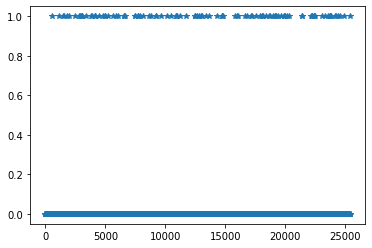

In [ ]:
def decision2(X, Y):
  y_0 = (Y == 0)
  y_1 = (Y == 1)
  y_2 = (Y == 2)

  m0 = model()
  m1 = model()
  m2 = model()

  y0_pred = m0.fit(X, y_0, batch_size = 32, epochs = 200)
  y1_pred = m1.fit(X, y_1, batch_size = 32, epochs = 200)
  y2_pred = m2.fit(X, Y_2, batch_size = 32, epochs = 200)

  return y0_pred, y1_pred, y2_pred



 # **Soft model**

In [46]:
def model():
  model = Sequential()
  model.add(Dense(units = 20, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 4))
  model.add(Dense(units = 15, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 10, kernel_initializer = 'random_normal', activation = 'tanh'))
  model.add(Dense(units = 1, kernel_initializer = 'random_normal', activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [47]:
def decision(X, Y):
  y_0 = (Y == 0).astype(int)
  #y_1 = (Y == 1).astype(int)

  m0 = model()
  #m1 = model()

  m0.fit(X, y_0, batch_size = 32, epochs = 300)
  #m1.fit(X, y_1, batch_size = 32, epochs = 200)

  return m0 #[m0, m1]

In [48]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
data = X_train
# create scaler
scaler = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scaler.fit(data)
# apply transform
normalized = scaler.transform(data)
# inverse transform
inverse = scaler.inverse_transform(normalized)


In [49]:
normalized

array([[ 0.45454545,  1.        ,  0.58120192, -0.19070417],
       [ 0.09090909, -1.        ,  0.48700012,  0.60695303],
       [ 0.09090909, -0.77777778,  0.09575638, -0.23846713],
       ...,
       [-0.63636364, -0.77777778,  0.08146008, -0.24915297],
       [-0.09090909,  1.        ,  0.36243088,  0.56220018],
       [ 0.81818182, -0.77777778,  0.49083096,  0.27784573]])

In [50]:
predictor = decision(normalized,Y_train)

Epoch 1/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6699 - accuracy: 0.6041
Epoch 2/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6642 - accuracy: 0.6044
Epoch 3/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6630 - accuracy: 0.6044
Epoch 4/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6622 - accuracy: 0.6044
Epoch 5/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6608 - accuracy: 0.6044
Epoch 6/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6601 - accuracy: 0.6044
Epoch 7/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6592 - accuracy: 0.6044
Epoch 8/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6590 - accuracy: 0.6045
Epoch 9/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6581 - accuracy: 0.6044
Epoch 10/300
625/625 [==============================] - 1s 1ms/step - loss: 0.6580 - accura

In [53]:
y_0 = Y_train==0

In [54]:
sum(y_0)

7905

In [51]:
sum(predictor.predict(normalized)>0.5)

array([3214])

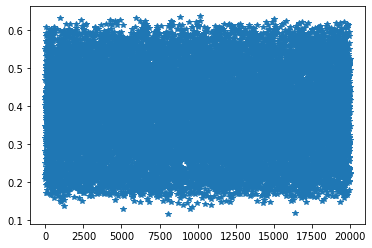

In [55]:
plt.plot(predictor.predict(normalized), '*')

In [57]:
from sklearn.metrics import accuracy_score

y0_prediction = (predictor.predict(normalized) > 0.5)
y0_train = (Y_train==1)
y0_test = (Y_test == 1)

accuracy_score(y0_train ,y0_prediction)

0.37785896601771685

# **Hard model**

In [75]:
def model_hard():
  model = Sequential()
  model.add(Dense(units = 80, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 4))
  model.add(Dense(units = 70, kernel_initializer = 'random_normal', activation = 'elu'))
  model.add(Dense(units = 60, kernel_initializer = 'random_normal', activation = 'selu'))
  model.add(Dense(units = 50, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 50, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 50, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 50, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 40, kernel_initializer = 'random_normal', activation = 'relu'))
  model.add(Dense(units = 30, kernel_initializer = 'random_normal', activation = 'softsign'))
  model.add(Dense(units = 20, kernel_initializer = 'random_normal', activation = 'softsign'))
  model.add(Dense(units = 10, kernel_initializer = 'random_normal', activation = 'tanh'))
  model.add(Dense(units = 10, kernel_initializer = 'random_normal', activation = 'tanh'))
  model.add(Dense(units = 1, kernel_initializer = 'random_normal', activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [76]:
def decision(X, Y):
  y_0 = (Y == 0).astype(int)
  #y_1 = (Y == 1).astype(int)

  m0 = model_hard()
  #m1 = model()

  m0.fit(X, y_0, batch_size = 32, epochs = 800)
  #m1.fit(X, y_1, batch_size = 32, epochs = 200)

  return m0 #[m0, m1]

In [77]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
data = X_train
# create scaler
scaler = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scaler.fit(data)
# apply transform
normalized = scaler.transform(data)
# inverse transform
inverse = scaler.inverse_transform(normalized)


In [78]:
normalized

array([[ 0.45454545,  1.        ,  0.58120192, -0.19070417],
       [ 0.09090909, -1.        ,  0.48700012,  0.60695303],
       [ 0.09090909, -0.77777778,  0.09575638, -0.23846713],
       ...,
       [-0.63636364, -0.77777778,  0.08146008, -0.24915297],
       [-0.09090909,  1.        ,  0.36243088,  0.56220018],
       [ 0.81818182, -0.77777778,  0.49083096,  0.27784573]])

In [79]:
predictor = decision(normalized,Y_train)

Epoch 1/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.6047
Epoch 2/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6636 - accuracy: 0.6043
Epoch 3/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.6080
Epoch 4/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.6049
Epoch 5/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6586 - accuracy: 0.6069
Epoch 6/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6573 - accuracy: 0.6083
Epoch 7/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6575 - accuracy: 0.6107
Epoch 8/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6553 - accuracy: 0.6125
Epoch 9/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6549 - accuracy: 0.6128
Epoch 10/800
625/625 [==============================] - 1s 2ms/step - loss: 0.6557 - accura

In [65]:
y_0 = Y_train==0

In [66]:
sum(y_0)

7905

In [80]:
sum(predictor.predict(normalized)>0.5)

array([5750])

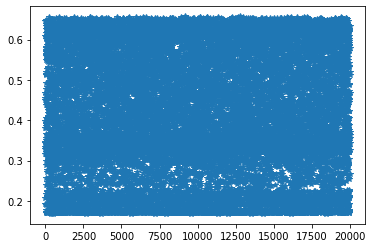

In [81]:
plt.plot(predictor.predict(normalized), '*')

In [70]:
from sklearn.metrics import accuracy_score

y0_prediction = (predictor.predict(normalized) > 0.5)
y0_train = (Y_train==0)
y0_test = (Y_test == 0)

accuracy_score(y0_train ,y0_prediction)

0.6377558680746709

In [73]:
norm_train = scaler.transform(X_test)

In [74]:
y0_predicTest = (predictor.predict(norm_train) > 0.5)
accuracy_score(y0_test ,y0_predicTest)

0.6242242242242242